#  Train a model on Titanic Disaster dataset


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

Import the dataset

In [37]:
data = pd.read_csv("train.csv") 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Plot a histogram for Age featrue

Text(0, 0.5, 'Passenger Count')

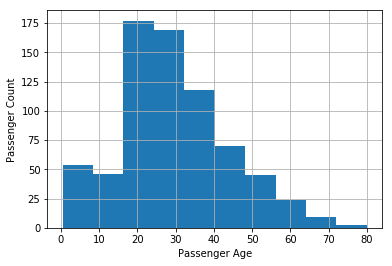

In [38]:
data['Age'].hist()
plt.xlabel("Passenger Age")
plt.ylabel("Passenger Count")

Plot a scatterplot colored according to survive, plot all survive points with y = 1 as orange and all unsurvive points with y=0  as blue

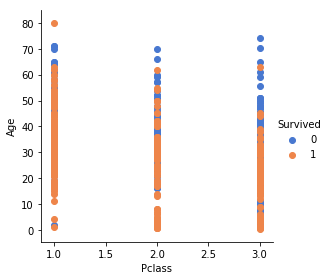

In [39]:
sn.FacetGrid(data,hue = 'Survived',palette='muted',height=4).map(plt.scatter,'Pclass', 'Age').add_legend()
plt.show()

To know if there are missing values in data, I use here count method.

In [41]:
data.count()


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Through the above information, Age class and Embarked have less information than other features.
Age is numerical class, we filling the missing values by calculating mean.
Embarked is categorical class we filling the missing values by finding the mode.

In [42]:
data.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

The (clean data) function perform the next:
- a. Removing irrelevant features.
- b. Imputing missing values by computing the mean of numerical features or the most common categorical value.
- c. Encode categorical values to numerical

In [43]:
def clean_data(data):
    cols_to_drop = ['PassengerId','Name','Ticket', 'Fare', 'Cabin']
    data.drop(cols_to_drop,1,inplace=True)
    mean_pass_age= data['Age'].mean()
    data['Age'].fillna(mean_pass_age,inplace=True)
    data['Embarked'].fillna('S',inplace=True)
    encode=LabelEncoder()
    encode_cols=['Embarked','Sex']
    data[encode_cols]=data[encode_cols].apply(lambda y: encode.fit_transform(y))
    
    

In [44]:
clean_data(data)

In [45]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


The traing_model) function perform the next:
- Train and test the model using Naive Bayes classifier. Use Gaussian, Multinomial, and Bernoulli classifier.
- Test and evaluate the performance model by computing the accuracy for each classifier.

In [85]:
def traing_model(data):
    label = data.iloc[:,:1]
    features=data.iloc[:,1:]
    x_train,x_test, y_train,y_test = train_test_split(features,label, test_size=0.25)
    
    gaussian=GaussianNB()
    berno=BernoulliNB()
    multinom=MultinomialNB()
  
    g_model=gaussian.fit(x_train,y_train.values.ravel())
    g_predict = g_model.predict(x_test)
    g_accuracy=accuracy_score(y_test,g_predict)
    
    b_model=berno.fit(x_train,y_train.values.ravel())
    b_predict = b_model.predict(x_test)
    b_accuracy=accuracy_score(y_test,b_predict)
    
    mul_model=multinom.fit(x_train,y_train.values.ravel())
    mul_predict = mul_model.predict(x_test)
    mul_accuracy=accuracy_score(y_test,mul_predict)
    
    print("Accuracy for Gaussian,Bernoulli and Multinomial Respectively :",format(g_accuracy*100,".2f"),
    format(b_accuracy*100,".2f"), format(mul_accuracy*100,".2f"))
    acc=[g_accuracy*100,b_accuracy*100,mul_accuracy*100]
    a=pd.DataFrame(acc)
    a.hist(bins=70, figsize=(8,8))
    plt.show()
    


Accuracy for Gaussian,Bernoulli and Multinomial Respectively : 81.61 79.37 68.61


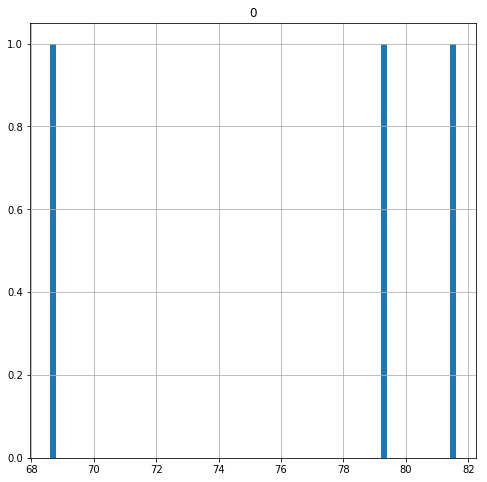

In [88]:
traing_model(data)